# Bioimage Analysis Project : Code
Submitted By:   

Juslina Pulikkal Jaimathu


Anasua Barman

## Load and Display Image channels in Napari

As an example here we work on the images of our sample Stiff.The code loads the multi-channel image and checks its shape. It then splits the image into three channels and visualizes each channel separately using grayscale color maps. 

In [9]:
# Import necessary libraries for image processing and visualization
from skimage.io import imread, imshow
import napari
import numpy as np
from matplotlib import pyplot as plt # matplotlib for plotting images
from skimage.filters import gaussian
import pyclesperanto_prototype as cle
from skimage import io, color, filters, measure
from matplotlib_scalebar.scalebar import ScaleBar


Image shape: (3440, 3440, 3)


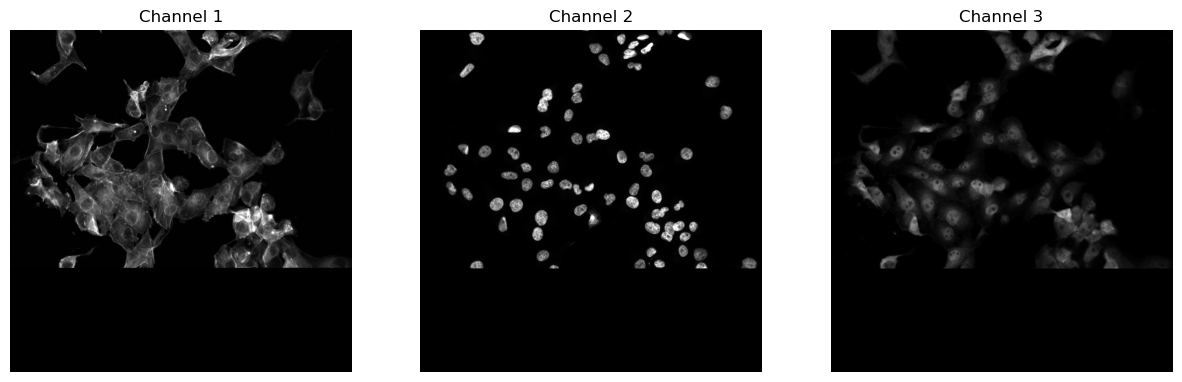

In [4]:
# Load the multi-channel image
image = imread("C:/Users/pjjus/Downloads/group5_MJ/Stiff  for analysis 28kPa.tif")

# Check the shape of the loaded image
print("Image shape:", image.shape)

# Split the image into its respective channels
channel_1 = image[:, :, 0]
channel_2 = image[:, :, 1]
channel_3 = image[:, :, 2]

# Display each channel separately using Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color_maps = ['gray', 'gray', 'gray']  # Define color maps for visualization

channels = [channel_1, channel_2, channel_3]
for i in range(3):
    axs[i].imshow(channels[i], cmap=color_maps[i])
    axs[i].set_title(f'Channel {i+1}')
    axs[i].axis('off')

# Show the figure with individual channels
plt.show()


### Merge the channels

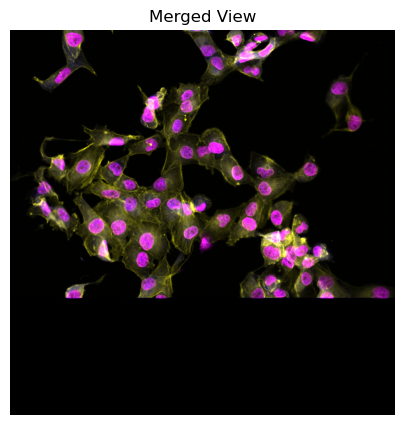

In [4]:
# Normalize each channel of the image to the [0, 1] range
image_norm = np.zeros_like(image, dtype=np.float32)
for i in range(3):
    image_norm[:, :, i] = image[:, :, i] / np.max(image[:, :, i])

# Create an empty RGB image to combine the channels
merged_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)

# Map each channel to a specific color in the RGB image
# Channel 1 -> Yellow (Red + Green)
merged_image[:, :, 0] += image_norm[:, :, 0]  # Red
merged_image[:, :, 1] += image_norm[:, :, 0]  # Green

# Channel 2 -> Magenta (Red + Blue)
merged_image[:, :, 0] += image_norm[:, :, 1]  # Red
merged_image[:, :, 2] += image_norm[:, :, 1]  # Blue

# Channel 3 -> Blue (Blue)
merged_image[:, :, 2] += image_norm[:, :, 2]  # Blue

# Clip values to [0, 1] range to avoid overflow
merged_image = np.clip(merged_image, 0, 1)

# Display the merged RGB image using Matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(merged_image)
plt.title('Merged View')
plt.axis('off')
plt.show()


## Visualize In Napari Viewer

In [23]:
# Display the individual channels and the normalized merged image in Napari viewer
import napari

with napari.gui_qt():
    viewer = napari.Viewer()
    
    # Add individual channels to Napari viewer
    viewer.add_image(channel_1, name='Channel 1', colormap='gray')
    viewer.add_image(channel_2, name='Channel 2', colormap='red')
    viewer.add_image(channel_3, name='Channel 3', colormap='blue')
    
    # Add the normalized merged image to Napari
    viewer.add_image(merged_image, name='Normalized Merged Image', contrast_limits=(0, 1))
    
    # Enable and configure the scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.position = "bottom_right"  # Position of the scale bar
    viewer.scale_bar.color = "white"  # Color of the scale bar


C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


## Gaussian Filtering
The code applies Gaussian filtering to three image channels to smooth and reduce noise. Using a Gaussian kernel with sigma=2, the filter blurs the images, enhancing their visual quality by averaging pixel values. The filtered channels are then displayed in grayscale to illustrate the effect of the smoothing.

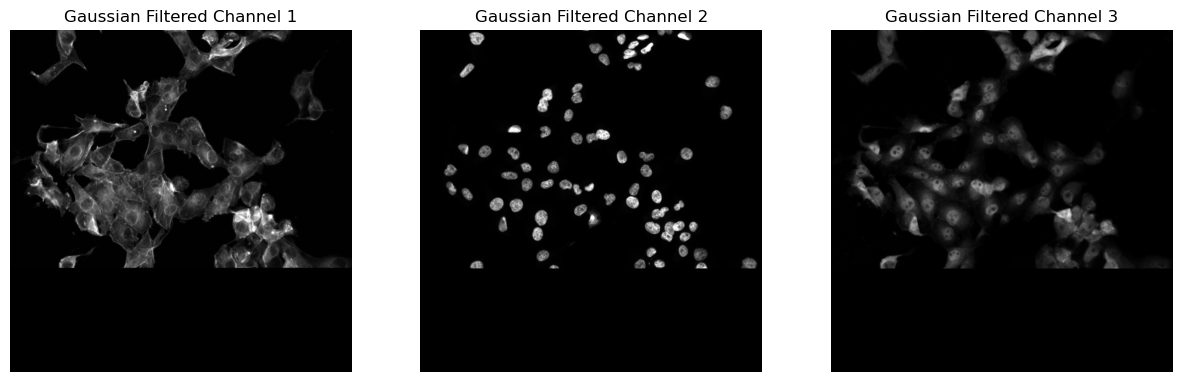

In [5]:
from skimage.filters import gaussian  # gaussian function from skimage.filters is used for smoothing images
import numpy as np  # numpy for array operations
from matplotlib import pyplot as plt 
# Apply Gaussian filtering to each channel
channel_1_filteredG = gaussian(channel_1, sigma=2)  # Apply Gaussian filter to channel 1
channel_2_filteredG = gaussian(channel_2, sigma=2)  # Apply Gaussian filter to channel 2
channel_3_filteredG = gaussian(channel_3, sigma=2)  # Apply Gaussian filter to channel 3

# Display each filtered channel with a suitable color map using Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
filtered_channels = [channel_1_filteredG, channel_2_filteredG, channel_3_filteredG]
color_maps = ['gray', 'gray', 'gray']  # Using grayscale color map for each channel

for i in range(3):
    axs[i].imshow(filtered_channels[i], cmap=color_maps[i])
    axs[i].set_title(f'Gaussian Filtered Channel {i+1}')
    axs[i].axis('off')

# Show the figure with filtered channel images
plt.show()


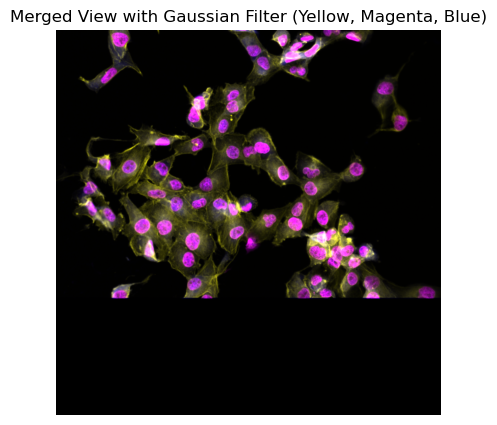

In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Normalize filtered images to [0, 1] range
filtered_image_norm = np.zeros_like(image, dtype=np.float32)
filtered_image_norm[:, :, 0] = channel_1_filteredG / np.max(channel_1_filteredG)
filtered_image_norm[:, :, 1] = channel_2_filteredG / np.max(channel_2_filteredG)
filtered_image_norm[:, :, 2] = channel_3_filteredG / np.max(channel_3_filteredG)

# Create an empty RGB image for the merged result
merged_imageG = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)

# Map each channel to a different color in the RGB image
# Channel 1 -> Yellow (Red + Green)
merged_imageG[:, :, 0] += filtered_image_norm[:, :, 0]  # Red
merged_imageG[:, :, 1] += filtered_image_norm[:, :, 0]  # Green

# Channel 2 
merged_imageG[:, :, 0] += filtered_image_norm[:, :, 1]  # Red
merged_imageG[:, :, 2] += filtered_image_norm[:, :, 1]  # Blue

# Channel 3 
merged_imageG[:, :, 2] += filtered_image_norm[:, :, 2]  # Blue

# Clip values to [0, 1] range to avoid overflow
merged_imageG = np.clip(merged_imageG, 0, 1)

# Display the merged RGB image with Gaussian filtering using Matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(merged_imageG)
plt.title('Merged View with Gaussian Filter (Yellow, Magenta, Blue)')
plt.axis('off')
plt.show()


The code merges three Gaussian-filtered image channels into an RGB image by mapping each channel to specific colors: yellow, magenta, and blue. It normalizes and combines the channels, clips the values to the [0, 1] range, and displays the result using Matplotlib.

## Top-Hat Filtering

 we applied top-hat filtering to enhance small features in each image channel. We used a large rectangular kernel for morphological opening, which was then subtracted from the original filtered image to highlight features smaller than the kernel size. This approach improves the visibility of fine details and is demonstrated through grayscale visualizations of the processed channels.

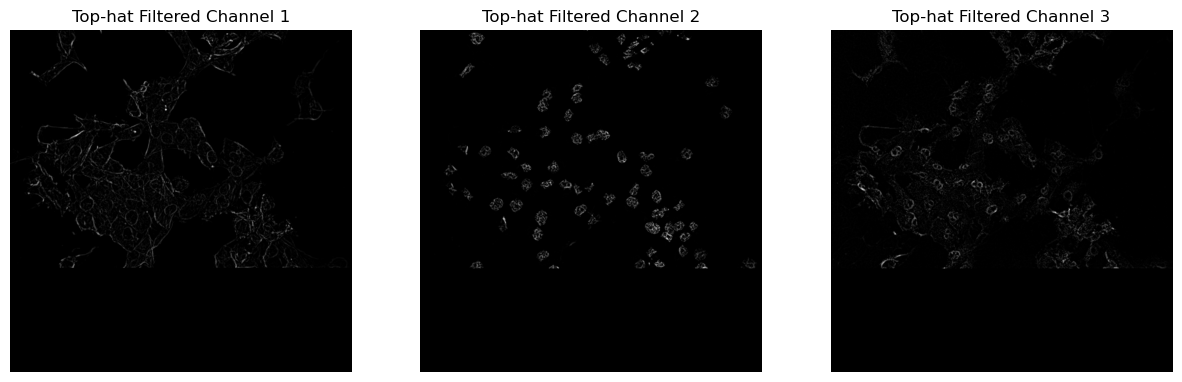

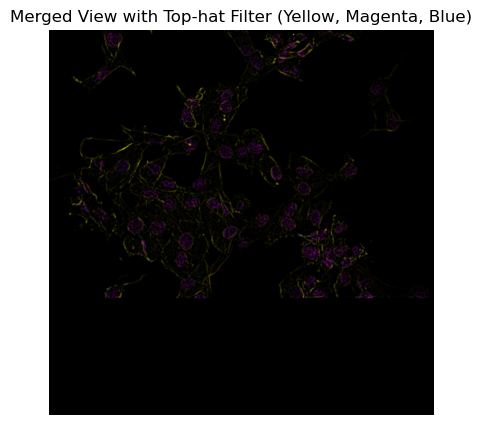

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)
Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


In [8]:
from scipy import ndimage
from skimage import morphology, util
from matplotlib import pyplot as plt


# Define the structuring element (kernel)
kernel_size = 20 # Used a large kernel size (100) for top-hat filtering in practice; this example uses a smaller size due to computational expense.

selem = morphology.rectangle(kernel_size, kernel_size)

# Apply the top-hat filter to each channel
# First, perform the morphological opening
opened1 = morphology.opening(channel_1_filteredG, selem)
opened2 = morphology.opening(channel_2_filteredG, selem)
opened3 = morphology.opening(channel_3_filteredG, selem)

# Then, subtract the opened image from the original image
tophat1G = channel_1_filteredG - opened1
tophat2G = channel_2_filteredG - opened2
tophat3G = channel_3_filteredG - opened3

# Normalize the result to fit in the range [0, 1]
tophat1G_norm = util.img_as_float(tophat1G)
tophat2G_norm = util.img_as_float(tophat2G)
tophat3G_norm = util.img_as_float(tophat3G)

# Display each top-hat filtered channel with a suitable color map
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color_maps = ['gray', 'gray', 'gray']

filtered_channels = [tophat1G_norm, tophat2G_norm, tophat3G_norm]
for i in range(3):
    axs[i].imshow(filtered_channels[i], cmap=color_maps[i])
    axs[i].set_title(f'Top-hat Filtered Channel {i+1}')
    axs[i].axis('off')

# Show the figure
plt.show()

# Create an empty RGB image for the merged result
merged_imageTG = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)

# Map each channel to a different color
# Channel 1 -> Yellow (Red + Green)
merged_imageTG[:, :, 0] += tophat1G_norm  # Red
merged_imageTG[:, :, 1] += tophat1G_norm  # Green

# Channel 2 -> Magenta (Red + Blue)
merged_imageTG[:, :, 0] += tophat2G_norm  # Red
merged_imageTG[:, :, 2] += tophat2G_norm  # Blue

# Channel 3 -> Blue (Blue)
merged_imageTG[:, :, 2] += tophat3G_norm  # Blue

# Clip values to [0, 1] range to avoid overflow
merged_imageTG = np.clip(merged_imageTG, 0, 1)

# Display the top-hat filtered merged image
plt.figure(figsize=(5, 5))
plt.imshow(merged_imageTG)
plt.title('Merged View with Top-hat Filter (Yellow, Magenta, Blue)')
plt.axis('off')
plt.show()
# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(tophat1G, name=' tophat Channel 1', colormap='gray',contrast_limits=(0, 1))
    viewer.add_image(tophat2G, name='tophat Channel 2', colormap='red',contrast_limits=(0, 1))
    viewer.add_image(tophat3G, name='tophat Channel 3', colormap='blue',contrast_limits=(0, 1))
    #image_merged = np.stack((channel_1, channel_2, channel_3), axis=-1)
    viewer.add_image(merged_imageTG, name='Merged Image', rgb=True)

    # Enable scale bar in Napari
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"
viewer.scale_bar.position = "bottom_right"  # Adjust as needed
viewer.scale_bar.color = "white"  # Adjust color as needed



# Median Filtering
We apply a median filter with a filter size of 30 to each image channel to reduce noise and then display the filtered channels in grayscale to visualize the  effect.

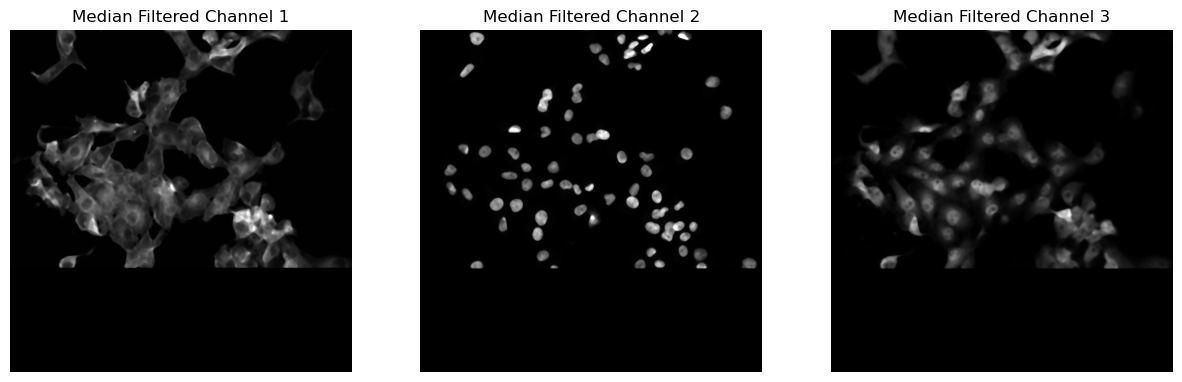

In [7]:
from scipy.ndimage import median_filter  # Median filter function
import numpy as np  
from matplotlib import pyplot as plt  
# Define the filter size
filter_size = 30

# Apply median filtering to each channel
channel_1_filteredM = median_filter(channel_1, size=filter_size)
channel_2_filteredM = median_filter(channel_2, size=filter_size)
channel_3_filteredM = median_filter(channel_3, size=filter_size)

# Display filtered channels
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
filtered_channels = [channel_1_filteredM, channel_2_filteredM, channel_3_filteredM]
color_maps = ['gray', 'gray', 'gray']

for i in range(3):
    axs[i].imshow(filtered_channels[i], cmap=color_maps[i])
    axs[i].set_title(f'Median Filtered Channel {i+1}')
    axs[i].axis('off')

plt.show()


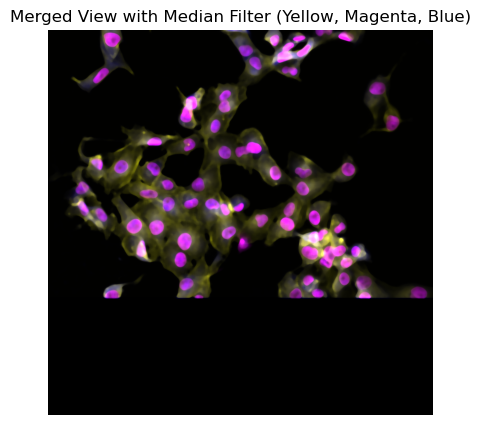

In [8]:
# Normalize filtered images to [0, 1] range
filtered_image_norm = np.zeros_like(image, dtype=np.float32)
filtered_image_norm[:, :, 0] = channel_1_filteredM / np.max(channel_1_filteredM)
filtered_image_norm[:, :, 1] = channel_2_filteredM / np.max(channel_2_filteredM)
filtered_image_norm[:, :, 2] = channel_3_filteredM / np.max(channel_3_filteredM)

# Create an empty RGB image for the merged result
merged_imageM = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)

# Map each channel to a different color
merged_imageM[:, :, 0] += filtered_image_norm[:, :, 0]  # Red (Channel 1)
merged_imageM[:, :, 1] += filtered_image_norm[:, :, 0]  # Green (Channel 1)
merged_imageM[:, :, 0] += filtered_image_norm[:, :, 1]  # Red (Channel 2)
merged_imageM[:, :, 2] += filtered_image_norm[:, :, 1]  # Blue (Channel 2)
merged_imageM[:, :, 2] += filtered_image_norm[:, :, 2]  # Blue (Channel 3)

# Clip values to [0, 1] range to avoid overflow
merged_imageM = np.clip(merged_imageM, 0, 1)

# Display the merged RGB image
plt.figure(figsize=(5, 5))
plt.imshow(merged_imageM)
plt.title('Merged View with Median Filter (Yellow, Magenta, Blue)')
plt.axis('off')
plt.show()


In [24]:
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(channel_1_filteredM, name='medainChannel 1', colormap='gray')
    viewer.add_image(channel_2_filteredM, name='medain Channel 2', colormap='red')
    viewer.add_image(channel_3_filteredM, name='medain Channel 3', colormap='blue')
    #image_merged = np.stack((channel_1, channel_2, channel_3), axis=-1)
    viewer.add_image(merged_imageM, name='Merged Image', rgb=True,contrast_limits=(0, 1))

    # Enable scale bar in Napari
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"
viewer.scale_bar.position = "bottom_right"  
viewer.scale_bar.color = "white" 

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


After evaluating the results, we determined that the Gaussian filtered images provided superior segmentation quality compared to the median filtered images. Consequently, we will proceed with the Gaussian filtered images for all subsequent analysis and processing.

# Segmentation of Images

We apply two different segmentation techniques to identify and label objects within the images. 

1. **Voronoi Otsu Threshold Labelling**: This technique uses Otsu's method to determine an optimal threshold and applies Voronoi-based labeling to segment the image.

 
2. **APOC Object Segmentation**:APOC Object Segmentation: APOC (A Python Object Classification) employs pre-trained machine learning models to segment objects within images. Having trained the model on labeled data to recognize specific features, we apply it to new images to segment objects based on the learned patterns.


### Voronoi Otsu Threshold Labelling

The Voronoi Otsu labeling involves:
1. **Thresholding**: Using Otsu’s method to determine an optimal threshold value that separates foreground objects from the background.
2. **Voronoi Labeling**: Applying Voronoi-based labeling to assign unique labels to different segmented regions based on the thresholded image.

Below, we use the `pyclesperanto_prototype` library to perform Voronoi Otsu labeling on the filtered channel image.
For the purpose of this example, we'll use `channel_2_filteredG` for segmentation. 

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
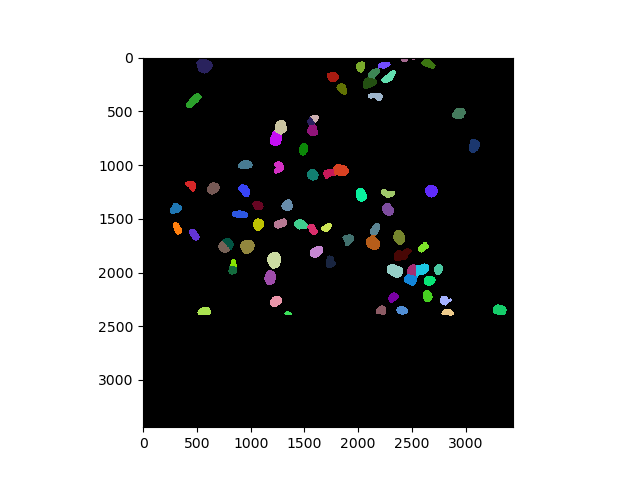

In [9]:
import pyclesperanto_prototype as cle  # Provides the Voronoi Otsu labeling function

# Perform Voronoi Otsu labeling on the filtered channel image
label_image = cle.voronoi_otsu_labeling(channel_2_filteredG, 
                                        spot_sigma=20,  # Sigma value for Gaussian smoothing of spots
                                        outline_sigma=10)  # Sigma value for Gaussian smoothing of outlines
channel_2_filteredGV = np.random.random((3440, 3440))  # Placeholder for actual image data
# Display the labeled image
label_image


Next,to display both the segmented image and its corresponding label

In [25]:
with napari.gui_qt():
    viewer = napari.Viewer()  
    viewer.add_image(label_image, name='Voronoi Otsu Segmented')  # Add the segmented image
    viewer.add_labels(label_image, name='Segmentation Otsu Labels')  # Add the label layer
    # Enable and configure the scale bar
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white"

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


# Apply APOC Object Segmentation
we utilize a pre-trained APOC object segmenter to segment the filtered image. The APOC segmenter was previously trained using the image data and the model was saved for later use.
The following code demonstrates loading the trained APOC segmenter, applying it to the filtered image, and visualizing the segmentation results.


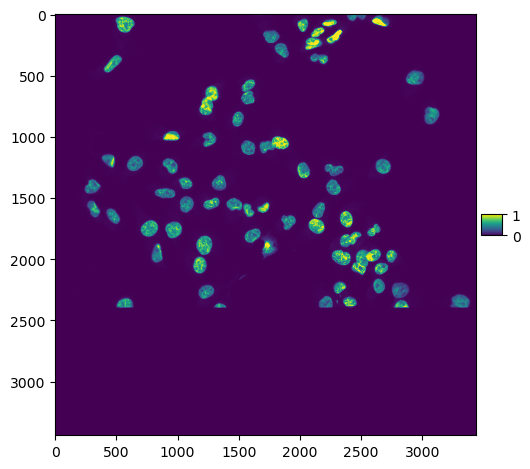

In [42]:
from skimage.io import imread, imshow  # Import functions for image handling
import pyclesperanto_prototype as cle  # Import Pyclesperanto for image processing
import numpy as np  # Import NumPy for array manipulation
from apoc import ObjectSegmenter  # Import the APOC object segmenter

# Load and display the input image
image = channel_2_filteredG
imshow(image)  # Display the image using skimage's imshow

# Initialize the segmenter with the path to the pre-trained model
segmenter = ObjectSegmenter(opencl_filename='C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/New STIFF/Segmented_Reuse_Stiff.cl')

# Apply the segmenter to the filtered image
segmentation_result = segmenter.predict(image=image)

# Display the segmentation result with Pyclesperanto
cle.imshow(segmentation_result, labels=True)


In [28]:

channel_2_filteredGS = np.random.random((3440, 3440))  
# Launch Napari GUI
with napari.gui_qt():
    viewer = napari.Viewer()  # Initialize Napari viewer
    viewer.add_image(segmentation_result, name='APOC Object Segmented') 
    viewer.add_labels(segmentation_result, name='Segmentation Labels')  
    # scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white"  

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


# Bland-Altman Analysis of Nuclei Counting

In this section, we perform Bland-Altman analysis to compare the nuclei counts obtained from the Voroni Otsu segmentation and APOC segmentation against manually counted nuclei (gold standard). The analysis is divided into several steps:

1. **Divide the image into regions** for nuclei counting.
2. **Manually count the nuclei** in each region to establish the gold standard.
3. **Count the nuclei** in each region from the Voroni Otsu and APOC segmented images.
4. **Create a Bland-Altman plot** to visualize the agreement between methods.


In [29]:
image = channel_2_filteredG

# Display the shape of the image
print("Image shape:", image.shape)


Image shape: (3440, 3440)


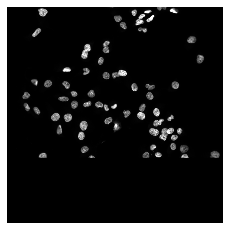

In [30]:
from microfilm.microplot import microshow

# Visualize the image using microshow
microshow(image)


Crop the image into specific regions to analyze different parts separately. We then visualize one of these cropped regions using the microshow function.

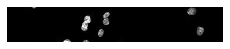

In [31]:
from microfilm.microplot import microshow

# Crop the image into different regions
cropped_image1 = image[100:747]
cropped_image2 = image[748:1395]
cropped_image3 = image[1396:2043]
cropped_image4 = image[2044:2691]
cropped_image5 = image[440:1000]

# Visualize one of the cropped regions
microshow(cropped_image5)


In [41]:
# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()


#add cropped roi
viewer.add_image(cropped_image1, name='cropped ROI1', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image2, name='croppedROI2', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image3, name='cropped ROI3', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image4, name='cropped ROI4', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image5, name='cropped ROI5', colormap='gray', contrast_limits=(0, 1))


# Enable scale bar in Napari
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"
viewer.scale_bar.position = "bottom_right"
viewer.scale_bar.color = "white"

# Start the Napari event loop
napari.run()

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


### Count the Nuclei
Next we count the number of nuclei in a region of interest.We use skimage.measure.label to count the number of labeled regions, which corresponds to the number of nuclei.

Number of nuclei: 11


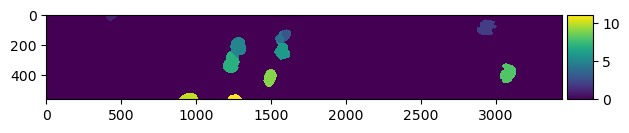

In [44]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from skimage import measure

label_imageC = nsbatwm.voronoi_otsu_labeling(cropped_image5, 
                                            spot_sigma=20, 
                                            outline_sigma=4)

# Display the labeled image
imshow(label_imageC)

# Count the number of nuclei
labels = measure.label(label_imageC, connectivity=2)  # Label connected components
num_cells = np.max(labels)  # The number of labeled regions
print(f'Number of nuclei: {num_cells}')


Next we count the number of nuclei in the currently loaded image region using the APOC object segmentation results. We utilize the Napari viewer to access the label layer and count the unique labels, which represent the nuclei. This method leverages Napari's GUI capabilities to facilitate interactive image analysis.

In [46]:
import napari
import numpy as np

# Assuming you have the viewer open and the segmented image as a label layer
viewer = napari.current_viewer()

# Get the label layer (assuming it's the first layer, adjust index if needed)
label_layer = viewer.layers[5].data

# Get the unique labels
unique_labels = np.unique(label_layer)

# Count the number of unique labels excluding the background (assumed to be 0)
num_labels = len(unique_labels) - 1 if 0 in unique_labels else len(unique_labels)

print(f"Number of labels: {num_labels}")


Number of labels: 13


# Bland-Altmann Analysis
Compare the nuclei counts obtained from the Voronoi Otsu segmentation method and the APOC object segmentation method against the manually counted gold standard. The Bland-Altman plot helps to visualize the agreement between different methods by plotting the mean of the counts against the difference between methods.

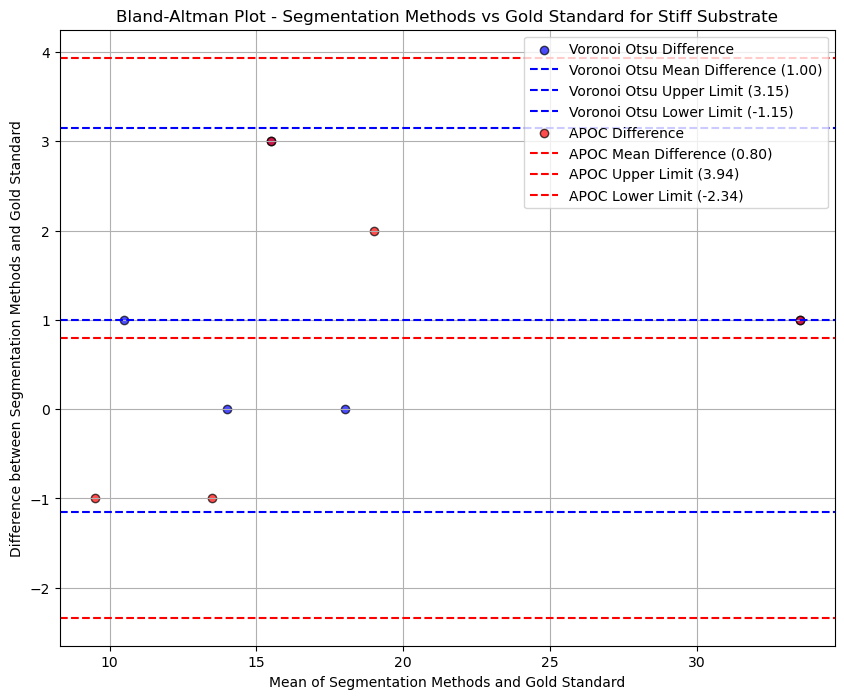

In [47]:
voronoi_segmented = np.array([17, 18, 34, 14, 11])  # Nuclei counts from Voronoi Otsu segmentation
gold_standard = np.array([14, 18, 33, 14, 10])       # Manually counted nuclei (gold standard)
apoc_segmented = np.array([13, 20, 34, 17, 9])       # Nuclei counts from APOC segmentation

# Function to create Bland-Altman plot
def bland_altman_plot(method1, method2, method1_name, method2_name, color, label_prefix):
    means = (method1 + method2) / 2
    differences = method1 - method2
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)
    
    plt.scatter(means, differences, color=color, edgecolor='k', alpha=0.7, label=f'{label_prefix} Difference')
    plt.axhline(mean_diff, color=color, linestyle='--', label=f'{label_prefix} Mean Difference ({mean_diff:.2f})')
    plt.axhline(mean_diff + 1.96 * std_diff, color=color, linestyle='--', label=f'{label_prefix} Upper Limit ({mean_diff + 1.96 * std_diff:.2f})')
    plt.axhline(mean_diff - 1.96 * std_diff, color=color, linestyle='--', label=f'{label_prefix} Lower Limit ({mean_diff - 1.96 * std_diff:.2f})')


plt.figure(figsize=(10, 8))

# Plot for Voronoi Otsu segmentation vs Gold Standard
bland_altman_plot(voronoi_segmented, gold_standard, 'Voronoi Otsu Segmentation', 'Gold Standard', 'blue', 'Voronoi Otsu')

# Plot for APOC segmentation vs Gold Standard
bland_altman_plot(apoc_segmented, gold_standard, 'APOC Segmentation', 'Gold Standard', 'red', 'APOC')

plt.xlabel('Mean of Segmentation Methods and Gold Standard')
plt.ylabel('Difference between Segmentation Methods and Gold Standard')
plt.title('Bland-Altman Plot - Segmentation Methods vs Gold Standard for Stiff Substrate')
plt.legend()
plt.grid(True)
plt.show()


### Saving the images

In [49]:
import imageio
# output paths
filtered_image_path = "C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/GAus filtered STIFF ch-2.tiff"
segmented_image_path = "C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/segmented STiFF ch-2.tiff"

# Save the images
imageio.imwrite(filtered_image_path, channel_2_filteredG)
imageio.imwrite(segmented_image_path, label_image)

print(f"Filtered image saved to: {filtered_image_path}")
print(f"Segmented image saved to: {segmented_image_path}")


Filtered image saved to: C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/GAus filtered STIFF ch-2.tiff
Segmented image saved to: C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/segmented STiFF ch-2.tiff


# Feature Extraction

we will extract features from the segmented images. We'll use the labeled_comprehension function from scipy.ndimage to compute properties of each labeled region.

In [50]:
input_image = imread(filtered_image_path)
voronoi_otsu_segmentation = imread(segmented_image_path)

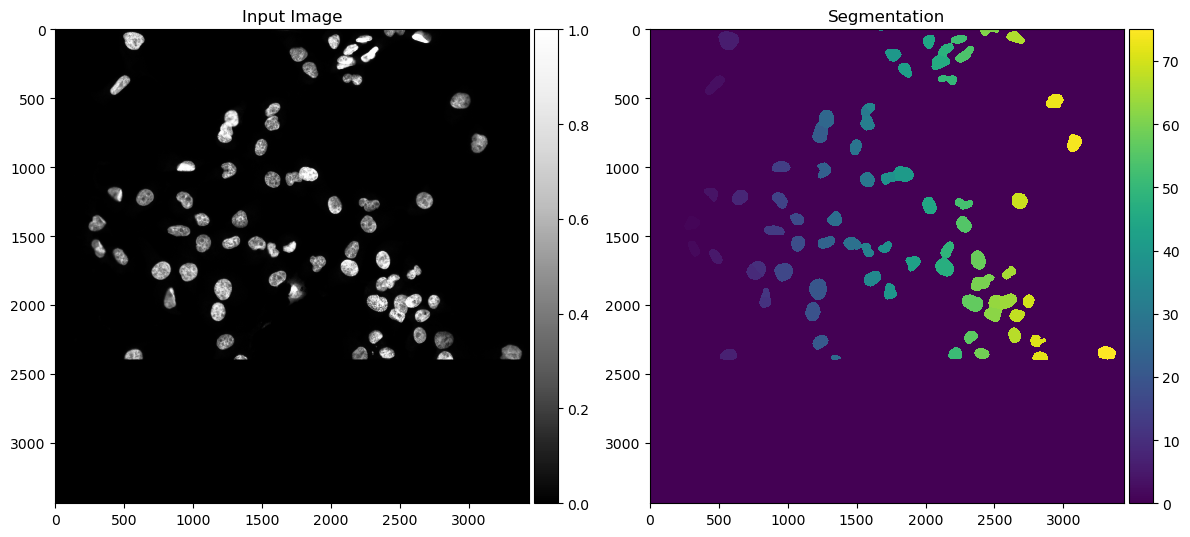

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Input Image')
imshow(input_image, cmap='Greys_r')

plt.subplot(1, 2, 2)
plt.title('Segmentation')
imshow(voronoi_otsu_segmentation)

plt.show()

In feature extraction from segmented images, we convert the segmented image to a boolean format to simplify area calculations. Each True pixel represents a part of the segmented object, allowing us to count pixels efficiently.

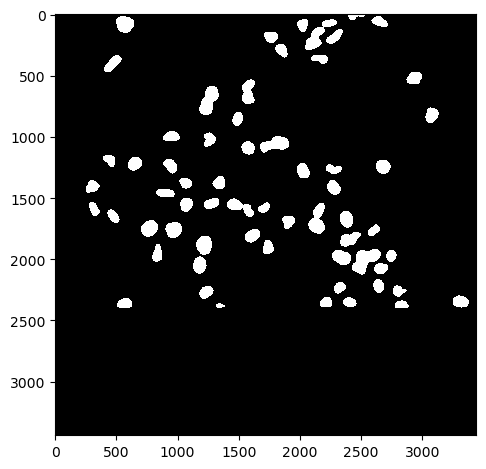

In [52]:
boolean_image = voronoi_otsu_segmentation.astype(bool)
imshow(boolean_image)

To compute the intensity for each segmented region, we use the boolean mask to extract corresponding pixel values from the filtered image. 

For each labeled region, the following features are calculated:

Label: Unique identifier for the region.

Area: Number of pixels in the region.

Perimeter: Length of the boundary of the region.

Mean Intensity: Average pixel intensity within the region.

Circularity: A measure of how circular the region is, calculated asThe formula for circularity is given by $\left(\frac{4\pi \times \text{Area}}{\text{Perimeter}^2}\right)$.


In [33]:
from __future__ import division, print_function

import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.measure import regionprops
import matplotlib.pyplot as plt

# Load the segmented and original images
input_image = imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/GAus filtered STIFF ch-2.tiff')
voronoi_otsu_segmentation = imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/segmented STiFF ch-2.tiff')

# Measure properties of labeled regions in the segmented image
props = regionprops(voronoi_otsu_segmentation, intensity_image=input_image)

# Extract relevant features from each region
data = []
for prop in props:
    label_id = prop.label                # Unique label for the region
    area = prop.area                    # Area of the region
    perimeter = prop.perimeter          # Perimeter of the region
    mean_intensity = prop.mean_intensity # Mean intensity within the region
    circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0  # Circularity of the region

    # Append features for the current region to the data list
    data.append([label_id, area, perimeter, mean_intensity, circularity])

# Create a DataFrame to organize the extracted features
df = pd.DataFrame(data, columns=['Label', 'Area', 'Perimeter', 'Mean Intensity', 'Circularity'])

# Save the DataFrame to a CSV file
df.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/measurements STIFF_Ch-2.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())


   Label     Area   Perimeter  Mean Intensity  Circularity
0      1   8658.0  359.504617        0.399833     0.841819
1      2   6986.0  332.676190        0.444011     0.793222
2      3  11356.0  443.227489        0.543303     0.726410
3      4   7061.0  335.806133        0.462933     0.786862
4      5   7462.0  339.161472        0.429321     0.815177


# Data Analysis

### Data Integration with Pandas
We integrate our measurement data from various CSV files into a single Pandas DataFrame.


In [14]:
import pandas as pd

# Load the CSV files
soft_ch2 = pd.read_csv("C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/New SOFT/measurements SOFT_Ch-2.csv")
soft_ch3 = pd.read_csv("C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/New SOFT/measurements SOFT_Ch-3.csv")
stiff_ch2 = pd.read_csv("C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/New STIFF/measurements STIFF_Ch-2.csv")
stiff_ch3 = pd.read_csv("C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/New STIFF/measurements STIFF_Ch-3.csv")
control_ch2 = pd.read_csv("C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/new CONTROL/measurements from segmented CONTROl image.csv")

# Add metadata columns
soft_ch2['Sample'] = 'Soft'
soft_ch2['Channel'] = 'Ch-2'

soft_ch3['Sample'] = 'Soft'
soft_ch3['Channel'] = 'Ch-3'

stiff_ch2['Sample'] = 'Stiff'
stiff_ch2['Channel'] = 'Ch-2'

stiff_ch3['Sample'] = 'Stiff'
stiff_ch3['Channel'] = 'Ch-3'

control_ch2['Sample'] = 'control'
control_ch2['Channel'] = 'Ch-2'



# Combine dataframes
combined_df = pd.concat([soft_ch2, soft_ch3, stiff_ch2,stiff_ch3,control_ch2], ignore_index=True)

# Display the combined dataframe
combined_df.head()


,Label,Area,Perimeter,Mean Intensity,Circularity,Sample,Channel
0,1,1628.0,185.154329,0.408298,0.596756,Soft,Ch-2
1,2,6689.0,376.249783,0.326292,0.593770,Soft,Ch-2
2,3,7723.0,329.806133,0.315858,0.892233,Soft,Ch-2
3,4,10859.0,395.747258,0.453212,0.871292,Soft,Ch-2
4,5,10760.0,397.889394,0.548311,0.854078,Soft,Ch-2


## Fitering by channel

In [15]:
# Filter data for Channel 2
channel_2_data = combined_df[combined_df['Channel'] == 'Ch-2']

# Filter data for Channel 3
channel_3_data = combined_df[combined_df['Channel'] == 'Ch-3']


## Plotting

### Channel 2

ANOVA p-values for Channel 2:
{'Area': 0.8148139091724256, 'Mean Intensity': 4.205261518274219e-12, 'Circularity': 1.0065834908306649e-05, 'Perimeter': 0.23737577721308611}


C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\3913615837.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_2_data, palette='husl')


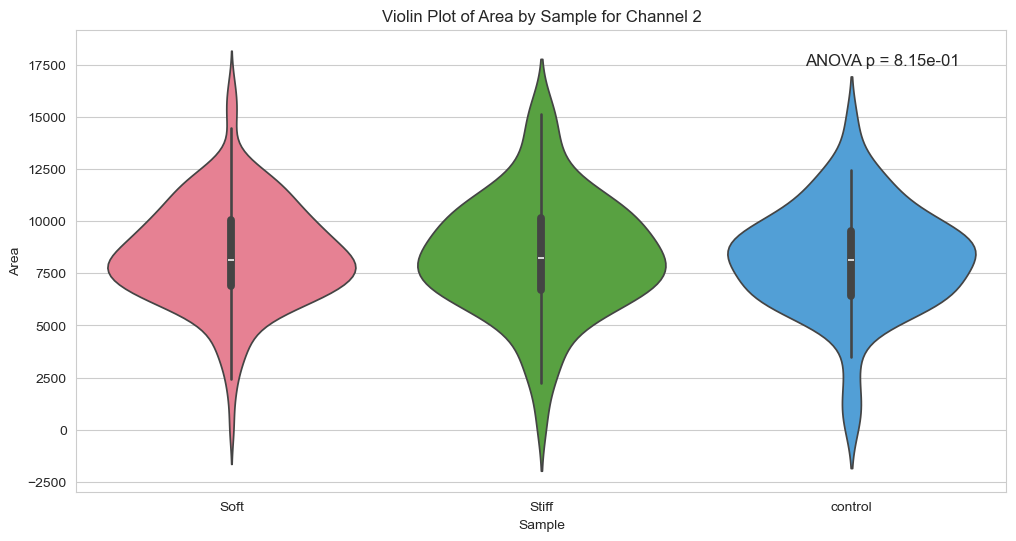

C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\3913615837.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_2_data, palette='husl')


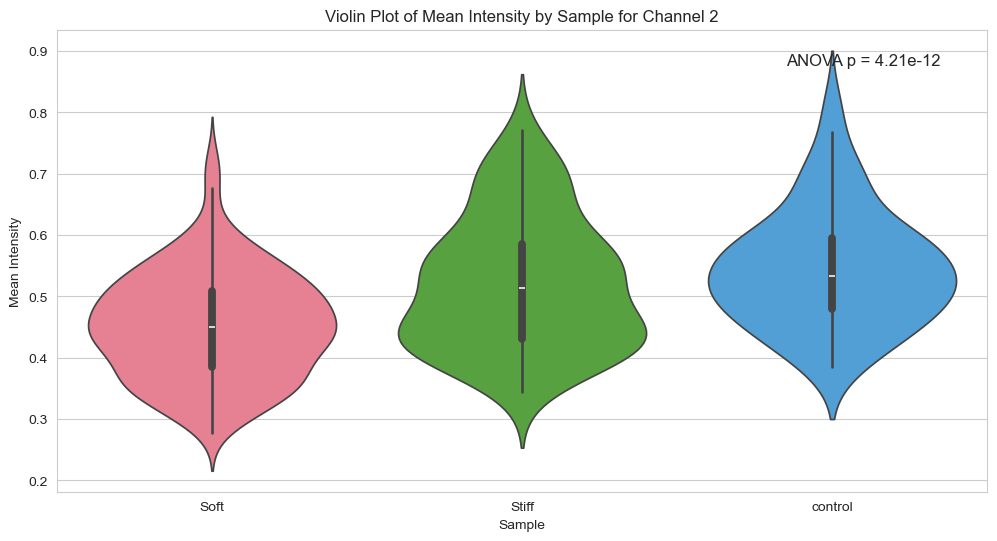

C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\3913615837.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_2_data, palette='husl')


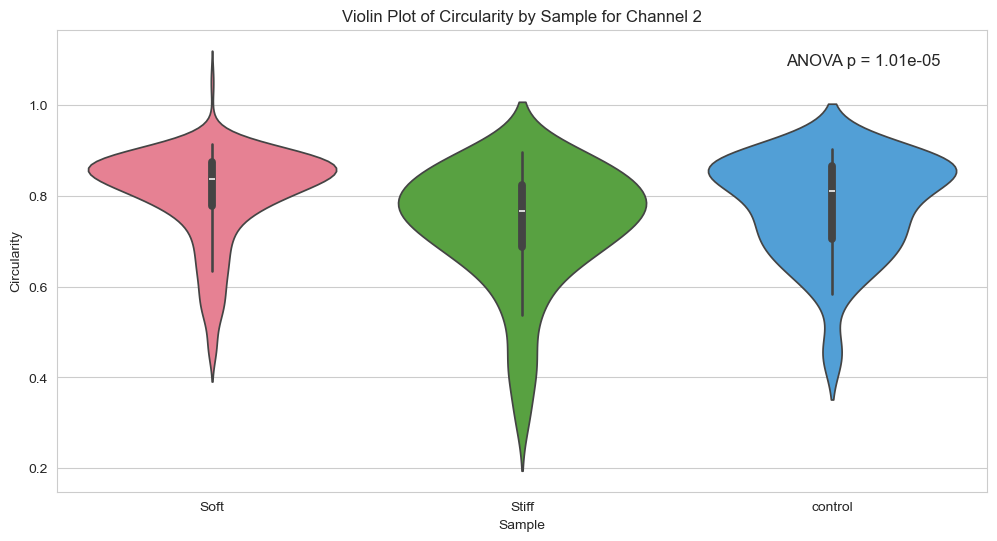

C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\3913615837.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_2_data, palette='husl')


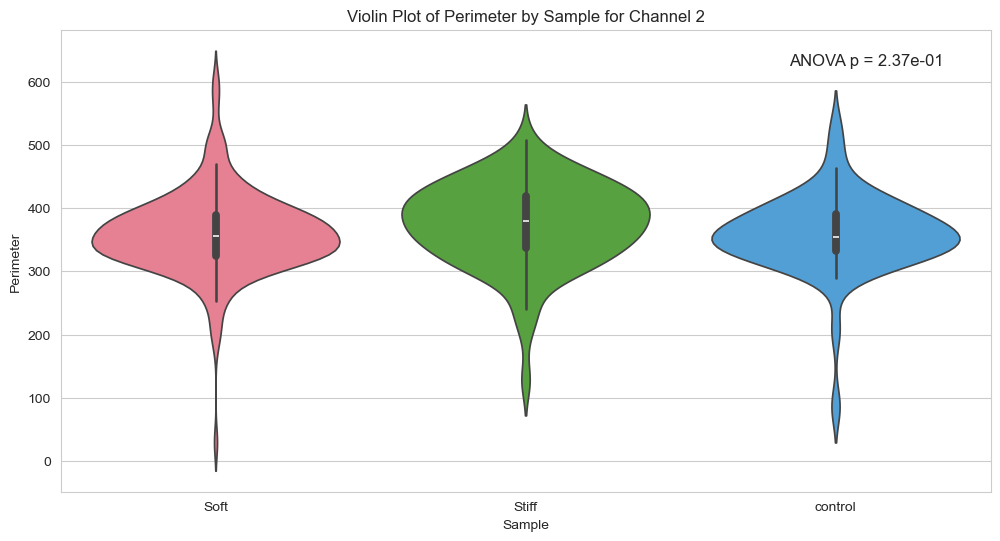

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# List of parameters including 'Perimeter'
parameters = ['Area', 'Mean Intensity', 'Circularity', 'Perimeter']

# Function to calculate ANOVA p-value
def calculate_anova_pvalue(df, parameter):
    data_by_sample = [df[df['Sample'] == sample][parameter] for sample in df['Sample'].unique()]
    return f_oneway(*data_by_sample).pvalue

# Calculate ANOVA p-values for all parameters
anova_p_values = {param: calculate_anova_pvalue(channel_2_data, param) for param in parameters}

print("ANOVA p-values for Channel 2:")
print(anova_p_values)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create individual violin plots for Channel 2 with ANOVA p-values in text
for param in parameters:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Sample', y=param, data=channel_2_data, palette='husl')
    plt.title(f'Violin Plot of {param} by Sample for Channel 2')
    plt.xlabel('Sample')
    plt.ylabel(param)
    
    # Add ANOVA p-value as text on the plot
    anova_p_value_str = f'ANOVA p = {anova_p_values[param]:.2e}'  # Format p-value in scientific notation
    plt.text(x=0.95, y=0.95, s=anova_p_value_str, ha='right', va='top', 
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='none'))
    
    plt.show()


### Channel 3

T-test p-values for Channel 3:
{'Area': {'Soft vs Stiff': 6.062986808275415e-14}, 'Mean Intensity': {'Soft vs Stiff': 3.384026908611926e-10}, 'Circularity': {'Soft vs Stiff': 8.325976217129342e-30}, 'Perimeter': {'Soft vs Stiff': 7.809039694724932e-27}}


C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\2462368716.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_3_data, palette='husl')


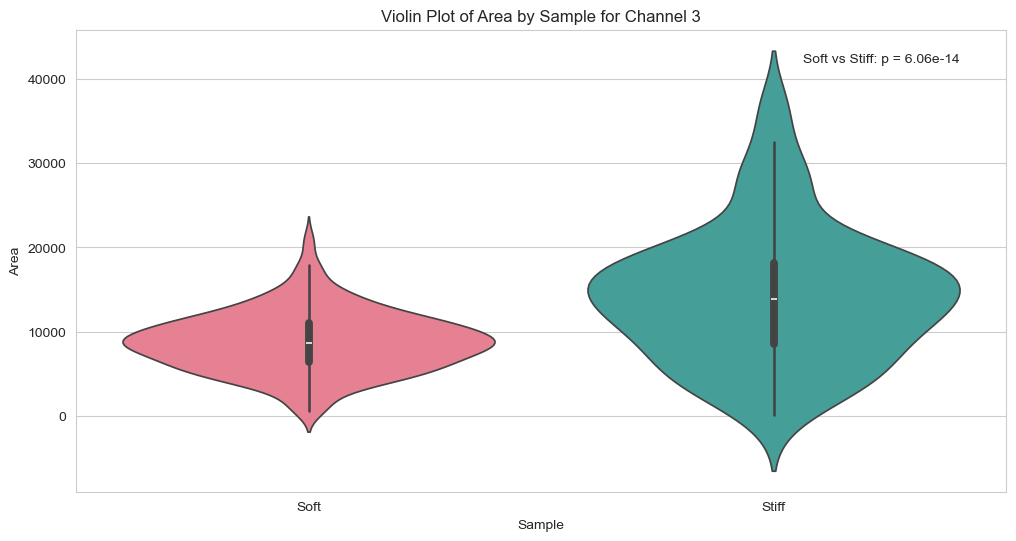

C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\2462368716.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_3_data, palette='husl')


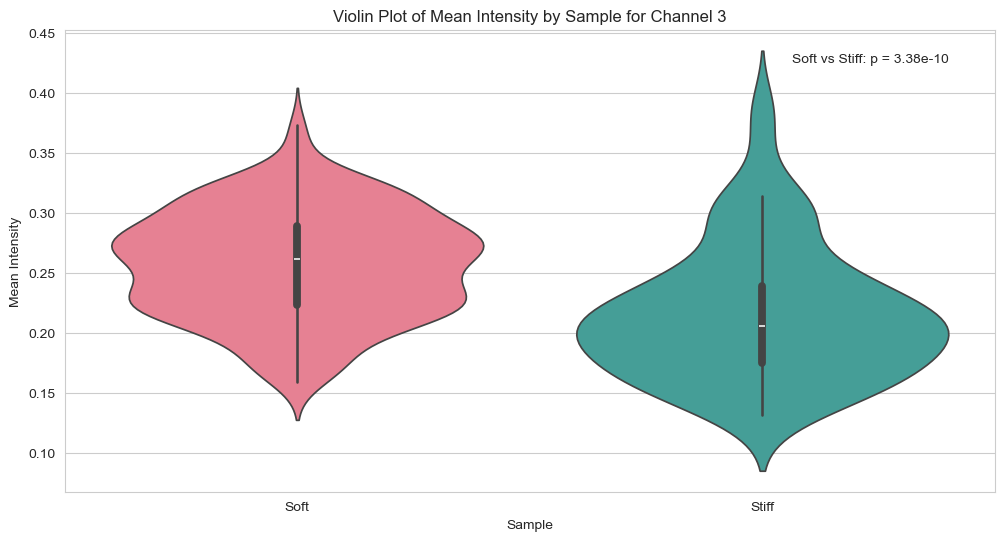

C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\2462368716.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_3_data, palette='husl')


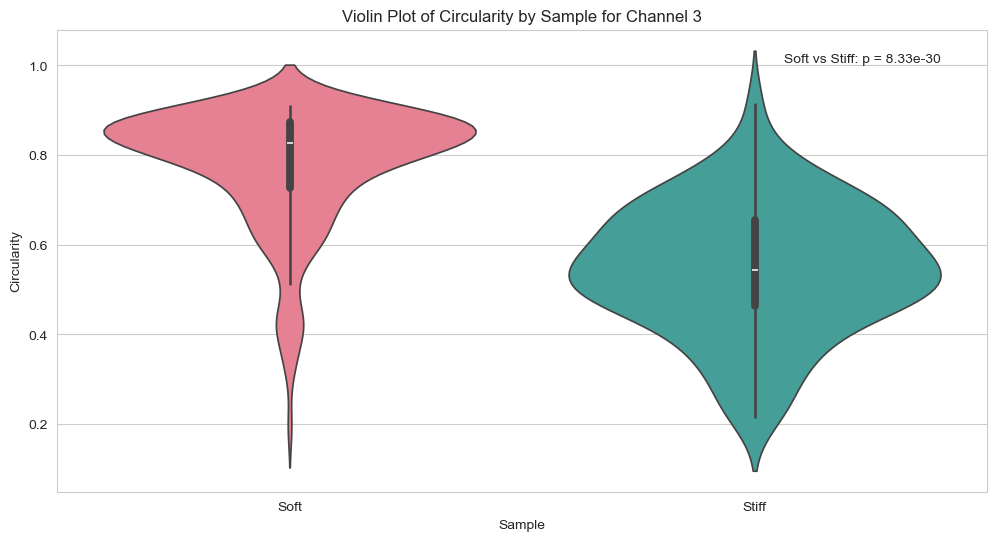

C:\Users\pjjus\AppData\Local\Temp\ipykernel_12508\2462368716.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sample', y=param, data=channel_3_data, palette='husl')


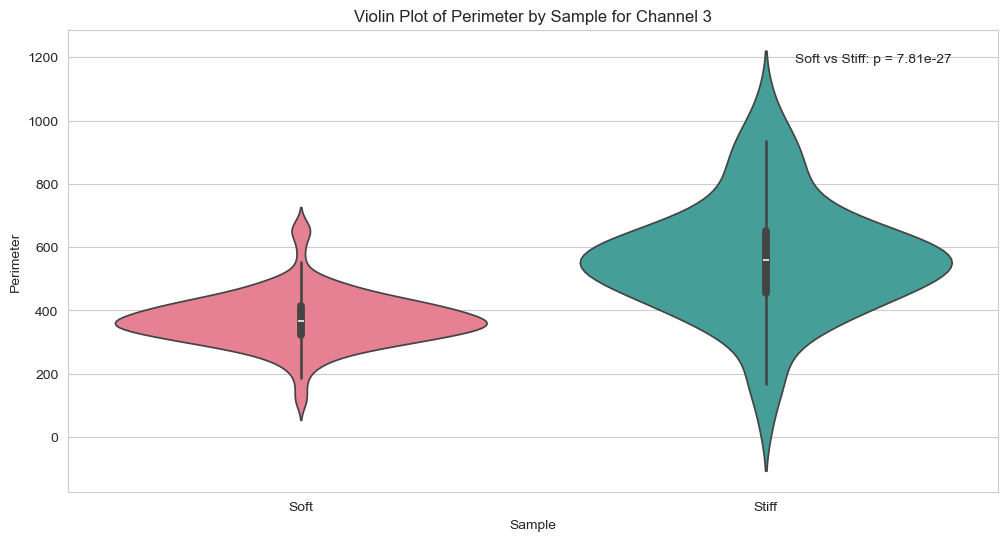

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Parameters to analyze
parameters = ['Area', 'Mean Intensity', 'Circularity', 'Perimeter']

# Function to calculate t-test p-values
def calculate_ttest_pvalue(df, parameter):
    samples = df['Sample'].unique()
    p_values = {}
    
    for i, sample1 in enumerate(samples):
        for sample2 in samples[i + 1:]:
            data1 = df[df['Sample'] == sample1][parameter]
            data2 = df[df['Sample'] == sample2][parameter]
            p_value = ttest_ind(data1, data2).pvalue
            p_values[f'{sample1} vs {sample2}'] = p_value
    
    return p_values

# Calculate t-test p-values for all parameters
t_test_p_values = {param: calculate_ttest_pvalue(channel_3_data, param) for param in parameters}

print("T-test p-values for Channel 3:")
print(t_test_p_values)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create violin plots for Channel 3 with t-test p-values
for param in parameters:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Sample', y=param, data=channel_3_data, palette='husl')
    plt.title(f'Violin Plot of {param} by Sample for Channel 3')
    plt.xlabel('Sample')
    plt.ylabel(param)
    
    # Add t-test p-values as text on the plot
    for comparison, p_value in t_test_p_values[param].items():
        plt.text(x=0.95, y=0.95 - 0.1 * list(t_test_p_values[param].keys()).index(comparison),
                 s=f'{comparison}: p = {p_value:.2e}', ha='right', va='top', 
                 transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='none', edgecolor='none'))
    
    plt.show()
